In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Duffing Oscillator Bifurcation

In this notebook, we will look a bit at the bifurcation of the Duffing oscillator. We will do this using the "slowly varying envelope approximation", equivalent to the RWA. We will follow this reference:

The bifurcations of duffing's equation: An application of catastrophe theory <br>
P.J.Holmes, D.A.Rand <br>
Journal of Sound and Vibration <br>
Volume 44, Issue 2, 22 January 1976, Pages 237-253 <br>
Journal of Sound and Vibration <br>
https://doi.org/10.1016/0022-460X(76)90771-9

We will parametrise the equation as:

$$
\ddot x + 2 \zeta \dot x + x + \alpha x^3 = \phi \cos \Omega t 
$$

In this form, the natural frequency $\omega_0 = 1$. 

We will consider motion of the oscillator: 

$$
x(t) = A(\Omega) \cos(\Omega t + \theta)
$$

We can derive the solutions for the amplitude by finding the roots of a characteristic polynomial. Defining a variable $y(\Omega) = (A(\omega))^2$ representing the square amplitude, Holmes shows that the value of $y$ is determined by the roots of the following polynomial:

$$
 9 \alpha^2 y^3 + 24 \alpha \rho y^2 + 16(\rho^2+\sigma^2)y - 16 \phi^2 = 0
$$

where  $\rho = 1 - \Omega^2$ and $\sigma = 2 \zeta \Omega$. We can then also calculate the phase $\theta$ using:

$$
\theta =  \arcsin(-\sigma A /\phi)
$$

In this notebook, we will find, plot, and explore the solutions of this as a function of driving frequency and force. 

For this, we will use the `roots()` function from numpy:

https://numpy.org/doc/stable/reference/generated/numpy.roots

In [41]:
def find_amp_phase(Omega, phi, Q = 100, alpha = 1):
    zeta = 0.5/Q
    rho = 1-Omega**2
    sigma = 2*zeta*Omega
    p = np.zeros(4)
    p[0] = 9*alpha**2
    p[1] = 24*alpha*rho
    p[2] = 16*(rho**2+sigma**2)
    p[3] = -16*phi**2
    y_roots = np.roots(p)
    A = np.sqrt(y_roots)
    theta = np.arcsin(-sigma*A/phi)
    return A,theta

Quick test: 

In [72]:
Omega = 1
phi = 1
find_amp_phase(Omega,phi,100,0)

(array([100.]), array([-1.57079633]))

## Check with linear HO ($\alpha = 0$)

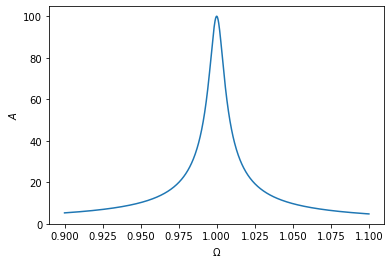

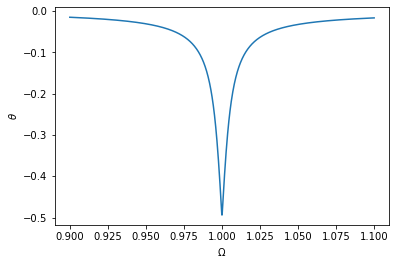

In [73]:
phi = 1
Omega = np.linspace(0.9,1.1,1000)
Q = 100
alpha = 0

A = []
theta = []
for O in Omega:
    a,t = find_amp_phase(O,phi,Q,alpha)
    A.append(a)
    theta.append(t)
A = np.array(A)
theta = np.array(theta)
plt.plot(Omega,A)
plt.xlabel("$\Omega$")
plt.ylabel("$A$")
plt.show()
plt.plot(Omega,theta/np.pi)
plt.xlabel("$\Omega$")
plt.ylabel(r"$\theta$")
plt.show()

Hmmm...the second plot does not look quite right? Not sure, it seems to match the Holmes and Rand formula? But above the resonance frequency, the phase should asymptote to $-\pi$? 

## Check with alpha = 1e-3, phi = tiny

This should also reduce to the linear HO

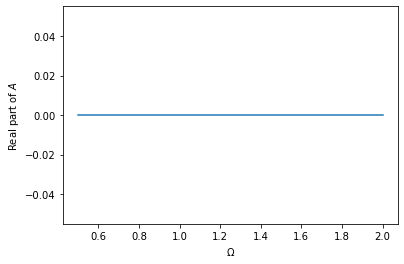

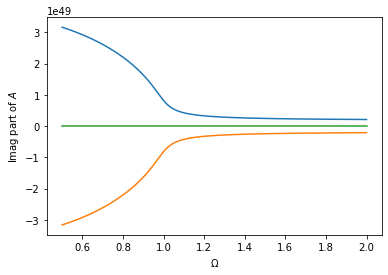

In [121]:
phi = 1e-9
Omega = np.linspace(0.5,2,1000)
alpha = 1e-99
Q = 10

A = []
theta = []
for O in Omega:
    a,t = find_amp_phase(O,phi,Q,alpha)
    A.append(a)
    theta.append(t)
A = np.array(A)
theta = np.array(theta)
plt.plot(Omega,np.real(A[:,2]))
plt.xlabel("$\Omega$")
plt.ylabel("Real part of $A$")
plt.show()
plt.plot(Omega,np.imag(A))
plt.xlabel("$\Omega$")
plt.ylabel("Imag part of $A$")
plt.show()

OK, this is giving nonsense! Let's debug by looking at the polynomial. First, alpha = 0:

In [106]:
def plot_poly():
    zeta = 0.5/Q
    rho = 1-Omega**2
    sigma = 2*zeta*Omega
    p = np.zeros(4)
    p[0] = 9*alpha**2
    p[1] = 24*alpha*rho
    p[2] = 16*(rho**2+sigma**2)
    p[3] = -16*phi**2
    poly = p[0]*y**3 + p[1]*y**2 + p[2]*y + p[3]
    plt.plot(y,np.abs(poly))
    plt.axhline(0,ls=":", c='grey')
    plt.xscale('log')
    plt.yscale('log')

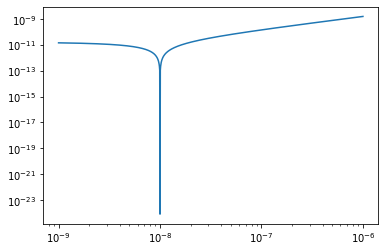

In [145]:
Q = 100
alpha = 0.3
phi = 1e-6
Omega = 1

y = np.geomspace(1e-9,1e-6,1000)
plot_poly()

OK, this seems reasonable? Let's check amplitude and phase. 

In [130]:
find_amp_phase(Omega,phi,Q,alpha)

(array([100.]), array([-1.57079633]))

OK, there seems to be some kind of numerical error when when alpha is small or phi is small. 

OK, found it. I needed to decrease phi. 

In [208]:
from ipywidgets import interact

phi_ind = np.geomspace(1e-4,1e-1,20)

def update_plot(n=0):
    phi = phi_ind[n]
    Omega = np.linspace(0.8,1.2,1000)
    alpha = 0.1
    Q = 100
    A = []
    theta = []
    for O in Omega:
        a,t = find_amp_phase(O,phi,Q,alpha)
        A.append(a)
        theta.append(t)
    A = np.array(A)
    theta = np.array(theta)
    plt.subplots(figsize=(15,4))
    plt.subplot(121)
    for i in range(3):
        plt.plot(Omega,np.real(A[:,i]))
    plt.xlabel("$\Omega$")
    plt.ylabel("Real part of $A$")
    plt.yscale('log')
    plt.axhline(0,ls=":",c="grey")
    plt.axvline(1,ls=":",c="grey")
    plt.subplot(122)
    plt.plot(Omega,np.imag(A))
    plt.xlabel("$\Omega$")
    plt.ylabel("Imag part of $A$")
    plt.axhline(0,ls=":",c="grey")
    plt.axvline(1,ls=":",c="grey")
    plt.show()

interact(update_plot, n = (0,len(phi_ind)-1,1))

interactive(children=(IntSlider(value=0, description='n', max=19), Output()), _dom_classes=('widget-interact',…

<function __main__.update_plot(n=0)>

In [206]:
from ipywidgets import interact

phi_ind = np.geomspace(1e-4,1e-1,20)

def update_plot(n=0):
    phi = phi_ind[n]
    Omega = np.linspace(0.9,1.1,1000)
    alpha = 0.1
    Q = 100
    A = []
    theta = []
    for O in Omega:
        a,t = find_amp_phase(O,phi,Q,alpha)
        A.append(a)
        theta.append(t)
    A = np.array(A)
    theta = np.array(theta)
    plt.subplots(figsize=(15,4))
    plt.subplot(121)
    for i in range(3):
        index = np.where(np.imag(A[:,i]) == 0)
        if len(index[0]) > 1:
            plt.plot(Omega[index],np.real(A[index,i][0,:]),'.')
    plt.xlabel("$\Omega$")
    plt.ylabel("Real part of $A$")
    plt.axhline(0,ls=":",c="grey")
    plt.axvline(1,ls=":",c="grey")
    plt.subplot(122)
    plt.plot(Omega,np.imag(A))
    plt.xlabel("$\Omega$")
    plt.ylabel("Imag part of $A$")
    plt.axhline(0,ls=":",c="grey")
    plt.axvline(1,ls=":",c="grey")
    plt.show()

interact(update_plot, n = (0,len(phi_ind)-1,1))

interactive(children=(IntSlider(value=0, description='n', max=19), Output()), _dom_classes=('widget-interact',…

<function __main__.update_plot(n=0)>